In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('fraudTrain.csv')

Taking the Dataset into the Dataframe so that we can easily perform operation on the Dataframe.

In [ ]:
df.head(10)

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0
5,5,4767265376804500,94.63,18917,40.3750,-75.2045,2158,1325376248,40.653382,-76.152667,0
6,6,30074693890476,44.54,67851,37.9931,-100.9893,2691,1325376282,37.162705,-100.153370,0
7,7,6011360759745864,71.65,22824,38.8432,-78.6003,6018,1325376308,38.948089,-78.540296,0
8,8,4922710831011201,4.27,15665,40.3359,-79.6607,1472,1325376318,40.351813,-79.958146,0
9,9,2720830304681674,198.39,37040,36.5220,-87.3490,151785,1325376361,37.179198,-87.485381,0


Type of column present in the DataFrame

In [ ]:
df.dtypes

Drop the unnecessary Column from the Dataframe that does not important for our model

In [ ]:
df=df.drop(['trans_date_trans_time','merchant','category','first','last','gender','trans_num','street','city','state','job','dob'],axis=1)

In [ ]:
df.shape

(1296675, 11)

Taking the feature set into x which is also called independent variable

In [ ]:
x=df.iloc[:,1:10]
x

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459
...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,15.56,84735,37.7175,-112.4777,258,1371816728,36.841266,-111.690765
1296671,6011149206456997,51.70,21790,39.2667,-77.5101,100,1371816739,38.906881,-78.246528
1296672,3514865930894695,105.93,88325,32.9396,-105.8189,899,1371816752,33.619513,-105.130529
1296673,2720012583106919,74.90,57756,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160


Take the output column in y variable which is called Dependent variable

In [ ]:
y=df.iloc[:,10]
y

0          0
1          0
2          0
3          0
4          0
          ..
1296670    0
1296671    0
1296672    0
1296673    0
1296674    0
Name: is_fraud, Length: 1296675, dtype: int64

Check how many 0 and 1 present in the output column

In [ ]:
print(df.is_fraud.value_counts())

0    1289169
1       7506
Name: is_fraud, dtype: int64


In [ ]:
df.isnull().sum()

Unnamed: 0    0
cc_num        0
amt           0
zip           0
lat           0
long          0
city_pop      0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

replace nan value by it's mean value of the output column

In [ ]:
df['is_fraud'].fillna(df['is_fraud'].median(), inplace = True)

In [ ]:
df.replace(0,np.median)
df

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,30263540414123,15.56,84735,37.7175,-112.4777,258,1371816728,36.841266,-111.690765,0
1296671,1296671,6011149206456997,51.70,21790,39.2667,-77.5101,100,1371816739,38.906881,-78.246528,0
1296672,1296672,3514865930894695,105.93,88325,32.9396,-105.8189,899,1371816752,33.619513,-105.130529,0
1296673,1296673,2720012583106919,74.90,57756,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160,0


0    1289169
1       7506
Name: is_fraud, dtype: int64


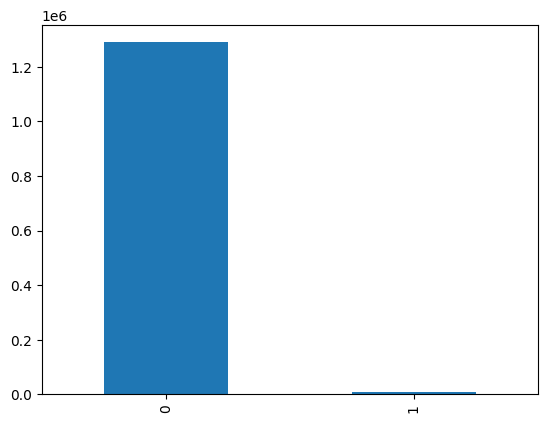

In [ ]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["is_fraud"].map(lambda x: color_wheel.get(x + 1))
print(df.is_fraud.value_counts())
p=df.is_fraud.value_counts().plot(kind="bar")

The dataset is unbalanced, to balanced the dataset we used oversampeling. As a result total number of 0 and 1 of the output column become equal

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

x_ros, y_ros = ros.fit_resample(x,y)

print('Original dataset shape', df.is_fraud.value_counts())
print('Resample dataset shape', np.unique(y_ros, return_counts=True))

Original dataset shape 0    1289169
1       7506
Name: is_fraud, dtype: int64
Resample dataset shape (array([0, 1]), array([1289169, 1289169]))


In [ ]:
x=x_ros
y=y_ros

0    1289169
1    1289169
Name: is_fraud, dtype: int64


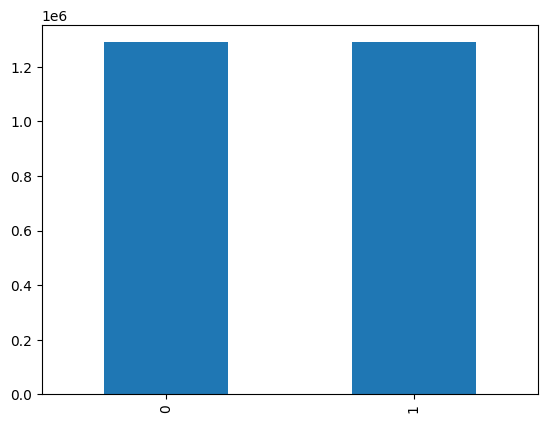

In [ ]:
import matplotlib.pyplot as plt
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = y.map(lambda x: color_wheel.get(x + 1))
print(y.value_counts())
p=y.value_counts().plot(kind="bar")

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

DecisionTree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',max_depth=3)
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
scores=cross_val_score(dt,x,y,cv=10)
print("Accuracy of Decission Tree is :",scores.mean()*100)
print(classification_report(ytest,ypred,digits=2))

Accuracy of Decission Tree is : 83.681195482221
              precision    recall  f1-score   support

           0       0.95      0.77      0.85    386419
           1       0.81      0.96      0.87    387083

    accuracy                           0.86    773502
   macro avg       0.88      0.86      0.86    773502
weighted avg       0.88      0.86      0.86    773502



LogisticRegression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
ypred1=lg.predict(xtest)
scores=cross_val_score(dt,x,y,cv=10)
print("Accuracy of Decission Tree is :",scores.mean()*100)
print(classification_report(ytest,ypred1,digits=2))

Accuracy of Decission Tree is : 83.681195482221
              precision    recall  f1-score   support

           0       0.80      0.95      0.87    386419
           1       0.94      0.76      0.84    387083

    accuracy                           0.86    773502
   macro avg       0.87      0.86      0.85    773502
weighted avg       0.87      0.86      0.85    773502



RandomForestClassifier Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)
rfc_pred = rfc.predict(xtest)
scores=cross_val_score(dt,x,y,cv=10)
print("Accuracy of Decission Tree is :",scores.mean()*100)
print(classification_report(ytest,rfc_pred,digits=2))

Accuracy of Decission Tree is : 83.681195482221
              precision    recall  f1-score   support

           0       0.74      1.00      0.85    386419
           1       1.00      0.65      0.78    387083

    accuracy                           0.82    773502
   macro avg       0.87      0.82      0.82    773502
weighted avg       0.87      0.82      0.82    773502

